In [11]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import Draw
import pubchempy as pcp

In [2]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m = Chem.MolFromMolFile('data/input.mol')
stringWithMolData=open('data/input.mol','r').read()
m = Chem.MolFromMolBlock(stringWithMolData)

In [4]:
m

In [7]:
m = Chem.MolFromMolFile('data/invalid.mol')
m is None

True

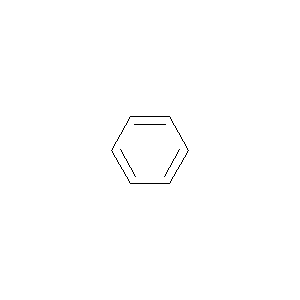

In [3]:
benzene = Chem.MolFromSmiles('C1=CC=CC=C1')
Draw.MolToImage(benzene)

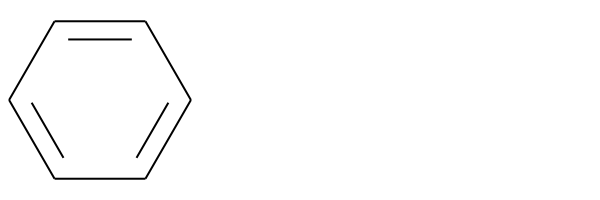

In [4]:
Draw.MolsToGridImage([benzene])

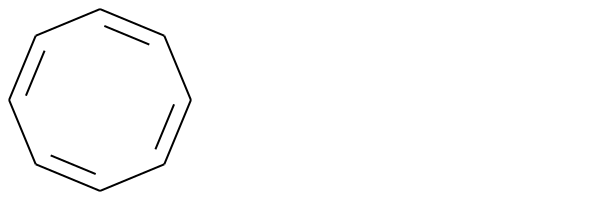

In [7]:
myoriginal = Chem.MolFromSmiles('C1=CC=CC=CC=C1')
Draw.MolsToGridImage([myoriginal])

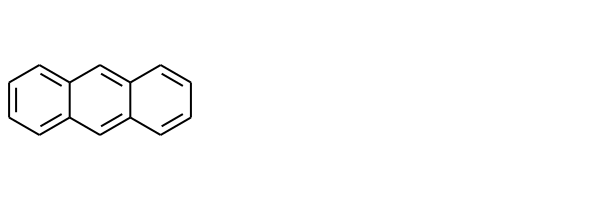

In [14]:
tmp = pcp.get_compounds('anthracene', 'name')[0]
anthracene = Chem.MolFromSmiles(tmp.isomeric_smiles)
Draw.MolsToGridImage([anthracene])

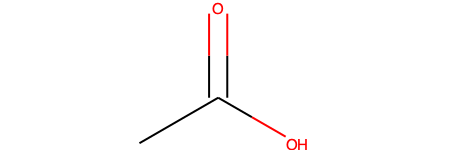

In [17]:
m1 = Chem.MolFromSmiles("CC(=O)O")
m1

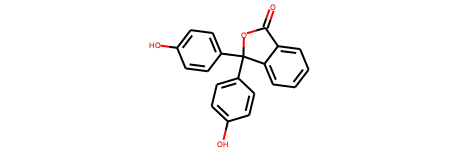

In [19]:
m2 = Chem.MolFromSmiles("O=C1OC(c2ccccc12)(c3ccc(O)cc3)c4ccc(O)cc4")
m2

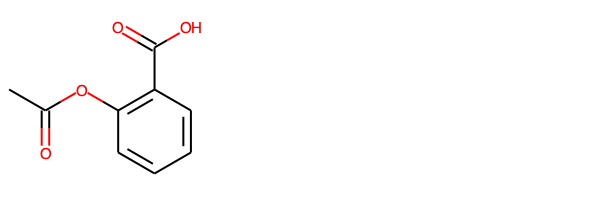

In [20]:
d1 = Chem.SDMolSupplier("sdf/Structure2D_CID_2244.sdf")
Draw.MolsToGridImage(d1)

In [22]:
# structural similarity between Acetic Acid and Formic Acid
c1 = Chem.MolFromSmiles('CC(=O)O')
c2 = Chem.MolFromSmarts('O=CO')

c1.GetSubstructMatches(c2)

((2, 1, 3),)

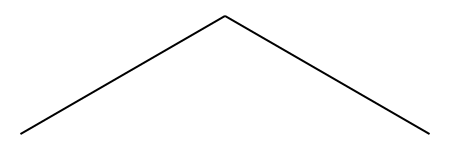

In [23]:
propane = Chem.MolFromSmiles('CCC')
propane

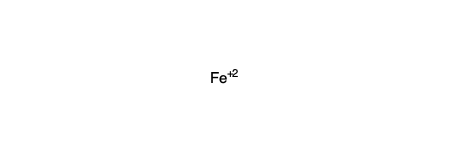

In [25]:
ironcation = Chem.MolFromSmiles('[Fe+2]')
ironcation

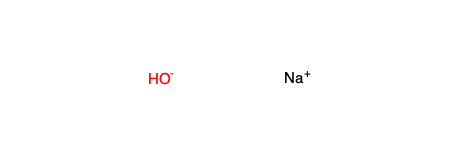

In [37]:
sodiumHydroxide = Chem.MolFromSmiles('[OH-].[Na+]')
sodiumHydroxide

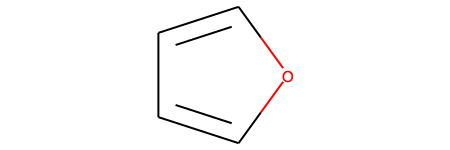

In [50]:
fran = Chem.MolFromSmiles('O1cccc1')
fran

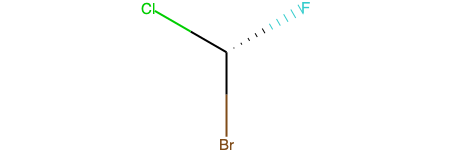

In [61]:
sbromoChloroFluoroMethane = Chem.MolFromSmiles('Br[C@H](Cl)F')
sbromoChloroFluoroMethane

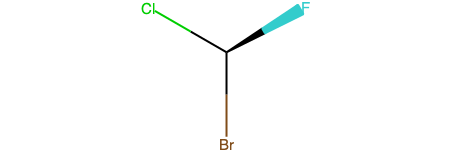

In [90]:
rbromoChloroFluoroMethane = Chem.MolFromSmiles('Br[C@@H](Cl)F')
rbromoChloroFluoroMethane

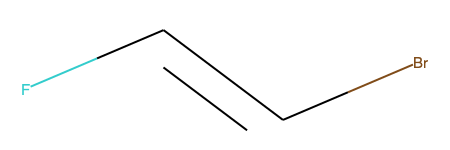

In [93]:
e1bromo2fluoroEthene = Chem.MolFromSmiles('F/C=C/Br')
e1bromo2fluoroEthene